# INF552 Assignment6 Support Vector Machines -- Part2
### Tong Lyu 1076139647
## 1 Introduction
### 1.1 Libraries

In [1]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statistics
import heapq

from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import svm
from sklearn.metrics import hamming_loss
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from scipy.spatial import distance

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score, roc_curve,auc
from sklearn.calibration import CalibratedClassifierCV
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## 3. Active Learning Using Support Vector Machines

In [2]:
#2a import data
penalties = list(10**exp for exp in range(-3,6))
M_ac = 50
al_data = pd.read_csv("./data/data_banknote_authentication.txt",header=None)
X_data = al_data.drop([4], axis=1)
y_data = al_data.loc[:,[4]]
X_data = (X_data-X_data.min())/(X_data.max()-X_data.min())
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,test_size = 472)

### 3.1 Passive Learning (2b i)

In [4]:
#2b i Passive learning
datacounts = np.arange(10,901,10)
passive_sts = pd.DataFrame(columns=datacounts.tolist())
def passive_modeling(X_train,y_train,cv):
    passive_model = svm.LinearSVC(penalty='l1',dual=False,tol=0.0001)
    parameters = {'C':penalties}
    clf = GridSearchCV(passive_model, parameters, cv = cv)
    clf.fit(X_train, y_train)
    return clf.best_estimator_
    
def passive_classifier(number_simulation):
    # train model 
    test_err = []
    X_use, X_notuse, y_use, y_notuse = train_test_split(X_train, y_train, train_size = 10, stratify= y_train)
    opt_model = passive_modeling(X_use,y_use,5)
    error = 1 - opt_model.score(X_test, y_test)
    test_err.append(error)
    
    while X_notuse.size > 50:
        X_pick, X_notuse, y_pick, y_notuse = train_test_split(X_notuse, y_notuse, train_size = 10, stratify= y_notuse)
        X_use = X_use.append(X_pick, ignore_index=True)
        y_use = y_use.append(y_pick, ignore_index=True)
        opt_model = passive_modeling(X_use,y_use,10)
        error = 1 - opt_model.score(X_test, y_test)
        test_err.append(error)
        #print("For %d data, the optimal penalty = %.5f, the MSE of test dataset = %.3f" %(count, opt_lamda,mse))
        
    X_use = X_use.append(X_pick, ignore_index=True)
    y_use = y_use.append(y_pick, ignore_index=True)
    opt_model = passive_modeling(X_use,y_use,10)
    error = 1 - opt_model.score(X_test, y_test)
    test_err.append(error)
    passive_sts.loc[number_simulation] = test_err
    print(test_err)
        
def passive_monte():
    for i in range(0,M_ac):
        print("\nThe No.%d experiment in Monte-Carlo:" %(i+1))
        passive_classifier(i)
    
    passive_avg = passive_sts.mean()
    return passive_avg

passive_avg = passive_monte()
print("\n\nAverage MSE for different size of datasets:")
pd.DataFrame(passive_avg).T


The No.1 experiment in Monte-Carlo:
[0.03601694915254239, 0.0402542372881356, 0.02330508474576276, 0.021186440677966156, 0.012711864406779627, 0.008474576271186418, 0.014830508474576232, 0.014830508474576232, 0.012711864406779627, 0.010593220338983023, 0.010593220338983023, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023

[0.10805084745762716, 0.05084745762711862, 0.044491525423728806, 0.03177966101694918, 0.044491525423728806, 0.04661016949152541, 0.029661016949152574, 0.012711864406779627, 0.021186440677966156, 0.021186440677966156, 0.021186440677966156, 0.021186440677966156, 0.008474576271186418, 0.01906779661016944, 0.021186440677966156, 0.01906779661016944, 0.01906779661016944, 0.021186440677966156, 0.01906779661016944, 0.021186440677966156, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.010593220338983023, 0.012711864406779627, 0.010593220338983023, 0.010593220338983023, 0.012711864406779627, 0.012711864406779627, 0.010593220338983023, 0.016949152542372836, 0.012711864406779627, 0.012711864406779627, 0.010593220338983023, 0.010593220338983023, 0.012711864406779627, 0.012711864406779627, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023,

[0.1313559322033898, 0.1228813559322034, 0.09957627118644063, 0.09957627118644063, 0.044491525423728806, 0.02754237288135597, 0.03813559322033899, 0.03177966101694918, 0.02754237288135597, 0.02754237288135597, 0.012711864406779627, 0.01906779661016944, 0.01906779661016944, 0.012711864406779627, 0.012711864406779627, 0.01906779661016944, 0.01906779661016944, 0.010593220338983023, 0.012711864406779627, 0.01906779661016944, 0.010593220338983023, 0.010593220338983023, 0.012711864406779627, 0.01906779661016944, 0.01906779661016944, 0.012711864406779627, 0.012711864406779627, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.012711864406779627, 0.012711864406779627, 0.010593220338983023, 0.010593220338983023, 0.012711864406779627, 0.012711864406779627, 0.010593220338983023, 0.010593220338983023, 0.01059322

[0.11016949152542377, 0.11652542372881358, 0.09745762711864403, 0.10169491525423724, 0.014830508474576232, 0.016949152542372836, 0.012711864406779627, 0.01906779661016944, 0.014830508474576232, 0.012711864406779627, 0.016949152542372836, 0.02330508474576276, 0.014830508474576232, 0.01906779661016944, 0.021186440677966156, 0.021186440677966156, 0.012711864406779627, 0.014830508474576232, 0.014830508474576232, 0.01906779661016944, 0.012711864406779627, 0.014830508474576232, 0.01906779661016944, 0.014830508474576232, 0.012711864406779627, 0.012711864406779627, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.010593220338983023, 0.012711864406779627, 0.010593220338983023, 0.012711864406779627, 0.012711864406779627, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.012711864406779627, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.0190

[0.03601694915254239, 0.02330508474576276, 0.02754237288135597, 0.021186440677966156, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.03389830508474578, 0.01906779661016944, 0.0423728813559322, 0.01906779661016944, 0.03601694915254239, 0.025423728813559365, 0.01906779661016944, 0.01906779661016944, 0.02330508474576276, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.012711864406779627, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.012711864406779627, 0.010593220338983023, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.010593220338983023, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.010593220338983023, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.0127118644067

[0.4046610169491526, 0.07203389830508478, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.021186440677966156, 0.021186440677966156, 0.021186440677966156, 0.016949152542372836, 0.016949152542372836, 0.016949152542372836, 0.021186440677966156, 0.02330508474576276, 0.02330508474576276, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.014830508474576232, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.01906779661016944, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.0105932203389

[0.15254237288135597, 0.02330508474576276, 0.03601694915254239, 0.044491525423728806, 0.03601694915254239, 0.014830508474576232, 0.02754237288135597, 0.021186440677966156, 0.021186440677966156, 0.01906779661016944, 0.01906779661016944, 0.014830508474576232, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.014830508474576232, 0.014830508474576232, 0.01906779661016944, 0.01906779661016944, 0.016949152542372836, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.014830508474576232, 0.014830508474576232, 0.01906779661016944, 0.01906779661016944, 0.014830508474576232, 0.014830508474576232, 

[0.39194915254237284, 0.021186440677966156, 0.02754237288135597, 0.01906779661016944, 0.025423728813559365, 0.021186440677966156, 0.01906779661016944, 0.01906779661016944, 0.021186440677966156, 0.021186440677966156, 0.021186440677966156, 0.021186440677966156, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.01906779661016944, 0.014830508474576232, 0.014830508474576232, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944,

[0.11228813559322037, 0.029661016949152574, 0.010593220338983023, 0.010593220338983023, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.021186440677966156, 0.021186440677966156, 0.012711864406779627, 0.021186440677966156, 0.012711864406779627, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944

[0.14406779661016944, 0.01906779661016944, 0.1313559322033898, 0.014830508474576232, 0.014830508474576232, 0.01906779661016944, 0.01906779661016944, 0.01906779661016944, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.01906779661016944, 0.01906779661016944, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.0127118644067796

,10,20,30,40,50,60,70,80,90,100,...,810,820,830,840,850,860,870,880,890,900
0,0.139576,0.050169,0.034534,0.032161,0.02428,0.023093,0.022797,0.023136,0.021695,0.020127,...,0.012542,0.012373,0.012415,0.012458,0.012458,0.012669,0.012669,0.012712,0.012669,0.012712


### 3.2 Active Learning (2b ii)

In [8]:
#2b ii active learning
active_sts = pd.DataFrame(columns=datacounts.tolist())
def active_modeling(X_train,y_train,cv):
    active_model = svm.LinearSVC(penalty='l1',dual=False,tol=0.0001)
    parameters = {'C':penalties}
    clf = GridSearchCV(active_model, parameters, cv = cv)
    clf.fit(X_train, y_train)
    return clf.best_estimator_
    
def active_classifier(number_simulation):
    # train model
    test_err = []
    X_use, X_notuse, y_use, y_notuse = train_test_split(X_train, y_train, train_size = 10, stratify= y_train)
    opt_model = active_modeling(X_use,y_use,5)
    error = 1 - opt_model.score(X_test, y_test)
    test_err.append(error)
 
    while not(X_notuse.empty):
        dists = np.absolute(opt_model.decision_function(X_notuse))
        indices = X_notuse.index.tolist()
        pos_dists = dict(zip(indices,dists))

        add_index = heapq.nsmallest(10,pos_dists,key=pos_dists.get)
        pick_data_x = X_notuse.loc[add_index,:]
        pick_data_y = y_notuse.loc[add_index,:]
        
        X_use = X_use.append(pick_data_x, ignore_index=True)
        y_use = y_use.append(pick_data_y, ignore_index=True)
        X_notuse = X_notuse.drop(add_index)
        y_notuse = y_notuse.drop(add_index)
        
        opt_model = active_modeling(X_use,y_use,10)
        error = 1 - opt_model.score(X_test, y_test)
        test_err.append(error)
    active_sts.loc[number_simulation] = test_err
    print(test_err)
        
def active_monte():
    for i in range(0,M_ac):
        print("\nThe No.%d experiment in Monte-Carlo:" %(i+1))
        active_classifier(i)
    
    active_avg = active_sts.mean()
    return active_avg

active_avg = active_monte()
print("\n\nAverage MSE for different size of datasets:")
pd.DataFrame(active_avg).T


The No.1 experiment in Monte-Carlo:
[0.1313559322033898, 0.025423728813559365, 0.052966101694915224, 0.02330508474576276, 0.012711864406779627, 0.012711864406779627, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.014830508474576232, 0.012711864406779627, 0.014830508474576232, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.014830508474576232, 0.01906779661016944, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.01906779661016944, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627,

[0.13983050847457623, 0.029661016949152574, 0.010593220338983023, 0.014830508474576232, 0.010593220338983023, 0.012711864406779627, 0.010593220338983023, 0.010593220338983023, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.014830508474576232, 0.012711864406779627, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.01906779661016944, 0.012711864406779627, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508

[0.08898305084745761, 0.025423728813559365, 0.03177966101694918, 0.029661016949152574, 0.014830508474576232, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.014830508474576232, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864

[0.012711864406779627, 0.052966101694915224, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.01906779661016944, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.01271186

[0.2436440677966102, 0.05932203389830504, 0.012711864406779627, 0.01906779661016944, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.016949152542372836, 0.010593220338983023, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.014830508474576232, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.014830508474576232, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.01906779661016944, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.014830508474576232, 0.014830508474576232, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.014830508474576232, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406

[0.07838983050847459, 0.06567796610169496, 0.025423728813559365, 0.012711864406779627, 0.014830508474576232, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.014830508474576232, 0.012711864406779627, 0.012711864406779627, 0.014830508474576232, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.014830508474576232, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864

[0.029661016949152574, 0.02330508474576276, 0.02330508474576276, 0.014830508474576232, 0.012711864406779627, 0.010593220338983023, 0.010593220338983023, 0.012711864406779627, 0.010593220338983023, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.014830508474576232, 0.014830508474576232, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.014830508474576232, 0.014830508

[0.09322033898305082, 0.014830508474576232, 0.0402542372881356, 0.016949152542372836, 0.012711864406779627, 0.010593220338983023, 0.010593220338983023, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.014830508474576232, 0.012711864406779627, 0.012711864406779627, 0.0148305084

[0.01906779661016944, 0.1694915254237288, 0.09957627118644063, 0.05084745762711862, 0.021186440677966156, 0.010593220338983023, 0.012711864406779627, 0.010593220338983023, 0.010593220338983023, 0.010593220338983023, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.014830508474576232, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.014830508474576232, 0.014830508474576232, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.014830508474576232, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.014830508474

[0.014830508474576232, 0.11016949152542377, 0.04661016949152541, 0.004237288135593209, 0.010593220338983023, 0.014830508474576232, 0.012711864406779627, 0.010593220338983023, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864406779627, 0.012711864

,10,20,30,40,50,60,70,80,90,100,...,810,820,830,840,850,860,870,880,890,900
0,0.119619,0.05428,0.034576,0.019915,0.015678,0.012246,0.011356,0.011144,0.011441,0.011992,...,0.013814,0.013814,0.013856,0.013814,0.013729,0.013475,0.01322,0.013305,0.013178,0.013093


### 3.3 Compare Passive and Active Learning (2b iii)

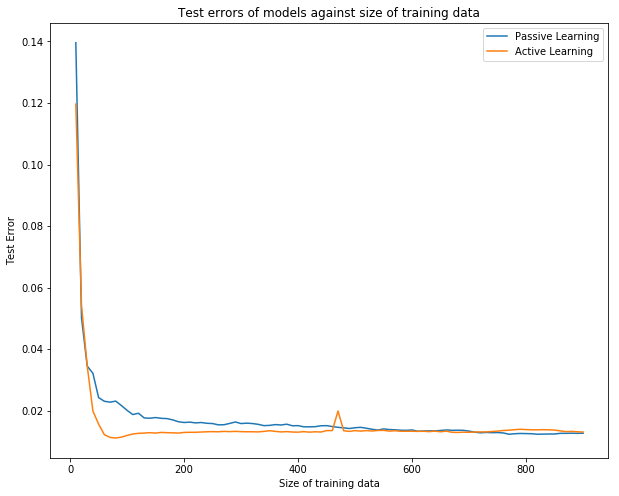

In [9]:
#2b iii Plot test errors
plt.figure(figsize=(10,8))
plt.title("Test errors of models against size of training data")
plt.plot(datacounts, passive_avg, label='Passive Learning')
plt.plot(datacounts, active_avg, label='Active Learning')
plt.legend(loc='higher right')
plt.xlabel('Size of training data')
plt.ylabel('Test Error')
plt.show()

#### Summary
The test error tends to decrease suddenly and then decease slowly as the size of datasets increase, and the active learning is better than passive learning.